# Scatter Plots - SPT Sample

### Focus: M500, Redshift, and Richness

Allen Pinjic - Created on May 19th, 2022

In [6]:
from astropy.io.fits import getdata
from astropy.table import Table
import numpy as np

In [7]:
fname = '../data_set/sptecs_catalog_oct919.fits'

data = Table(getdata(fname))

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = data.to_pandas()

h = 0.7
df['log_M500'] = np.log10(df.M500*1e14*h)

df0 = df

/data0/sw/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
redshift = df0.REDSHIFT.to_numpy()
lbd = df0.LAMBDA_CHISQ.to_numpy()
zcut = (redshift > 0.1) & (redshift < 0.65)
lcut = lbd > 20
final_cut = zcut & lcut

In [11]:
df = df0.loc[final_cut].copy()

In [12]:
df

,SPT_ID,RA,DEC,FIELD,XI,THETA_CORE,REDSHIFT,REDSHIFT_UNC,SPECZ,REDSHIFT_SOURCE,...,M500_LERR,LAMBDA_CHISQ,LAMBDA_CHISQ_E,RADIO_CONTAM,STRONG_LENS,IMAGE_SOURCE,SPECZ_REF,STRONG_LENS_REF,PHOTOMETRIC_ZREF,log_M500
1,SPT-CLJ0005-3751,1.438318,-37.854369,ra1hdec-35,6.336327,0.75,0.482958,0.007242,0,4.0,...,0.887,86.408386,4.735215,0.0,1.0,3.0,,,,14.579018
2,SPT-CLJ0005-3443,1.487651,-34.719271,ra1hdec-35,5.514429,2.00,0.114000,0.000000,1,9.0,...,1.005,105.385574,4.646943,0.0,0.0,8.0,1989ApJS...70....1A,,,14.571418
7,SPT-CLJ0020-2543,5.173062,-25.727583,ra1hdec-25,7.141808,1.50,0.141000,0.000000,1,9.0,...,1.077,101.159950,18.001257,0.0,0.0,8.0,1999ApJS..125...35S,,,14.692856
10,SPT-CLJ0042-2831,10.526915,-28.522130,ra1hdec-25,8.122652,1.75,0.108600,0.000000,1,9.0,...,1.103,70.527962,2.828000,0.0,0.0,8.0,2002MNRAS.329...87D,,,14.734903
11,SPT-CLJ0042-3809,10.613344,-38.151329,ra1hdec-35,6.616126,1.25,0.219660,0.000000,1,9.0,...,0.984,74.723076,2.981047,0.0,0.0,8.0,1996ApJ...470..172S,,,14.623611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,SPT-CLJ0552-4008,88.123056,-40.136343,ra5hdec-35,4.359108,2.00,0.362500,0.009275,0,4.0,...,0.897,65.890450,4.650317,0.0,0.0,3.0,,,,14.441915
429,SPT-CLJ0554-3149,88.528647,-31.830573,ra5hdec-35,4.620441,0.25,0.218471,0.005045,0,4.0,...,0.944,21.193373,2.535579,0.0,0.0,3.0,,,,14.477150
430,SPT-CLJ0556-2502,89.156331,-25.042366,ra5hdec-25,4.130208,0.25,0.624432,0.013504,0,4.0,...,0.815,20.384859,2.782436,0.0,0.0,3.0,,,,14.405722
431,SPT-CLJ0557-2626,89.371706,-26.437366,ra5hdec-25,4.008900,0.75,0.598462,0.008865,0,4.0,...,0.798,45.250465,3.503051,0.0,0.0,3.0,,,,14.403927


In [13]:
# Tesing data retrieval
data.colnames

['SPT_ID',
 'RA',
 'DEC',
 'FIELD',
 'XI',
 'THETA_CORE',
 'REDSHIFT',
 'REDSHIFT_UNC',
 'SPECZ',
 'REDSHIFT_SOURCE',
 'RM_PROB',
 'CL_NOTES',
 'M500',
 'M500_UERR',
 'M500_LERR',
 'LAMBDA_CHISQ',
 'LAMBDA_CHISQ_E',
 'RADIO_CONTAM',
 'STRONG_LENS',
 'IMAGE_SOURCE',
 'SPECZ_REF',
 'STRONG_LENS_REF',
 'PHOTOMETRIC_ZREF']

In [14]:
# Setting the background
sns.set_theme(style="darkgrid")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


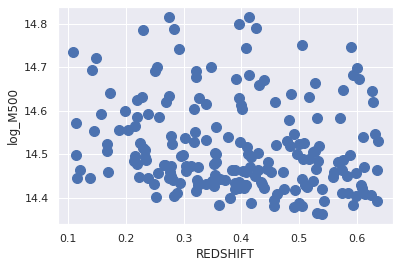

In [15]:
# Orifginal method for creating a scatter plot
df.plot.scatter(x = 'REDSHIFT', y = 'log_M500', s = 100);

Text(0, 0.5, 'Value of M500')

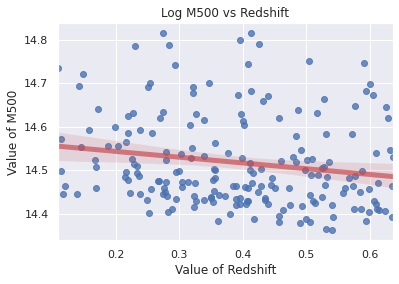

In [16]:
sns.regplot(x=df["REDSHIFT"], y=df["log_M500"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title('Log M500 vs Redshift')
plt.xlabel('Value of Redshift')
plt.ylabel('Value of M500')

Text(0, 0.5, 'Value of Log M500')

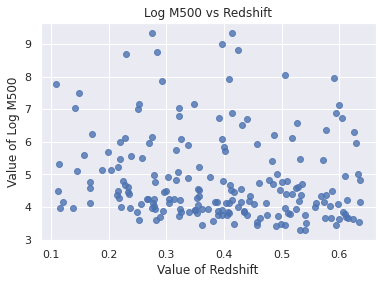

In [17]:
# Alternate version w/ no linear regression
ax = sns.regplot(x=df["REDSHIFT"], y=df["M500"], fit_reg=False)
plt.title('Log M500 vs Redshift')
plt.xlabel('Value of Redshift')
plt.ylabel('Value of Log M500')

In [87]:
## sns.lmplot( x="M500", y="REDSHIFT", data=df, fit_reg=False, hue='___', legend=True)
# Move the legend to an empty part of the plot
# plt.legend(loc='lower right')

Text(0, 0.5, 'Value of Richness')

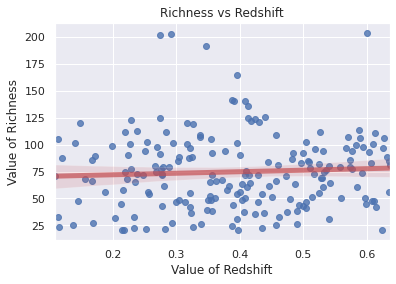

In [18]:
sns.regplot(x=df["REDSHIFT"], y=df["LAMBDA_CHISQ"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title('Richness vs Redshift')
plt.xlabel('Value of Redshift')
plt.ylabel('Value of Richness')

Text(0, 0.5, 'Value of Log M500')

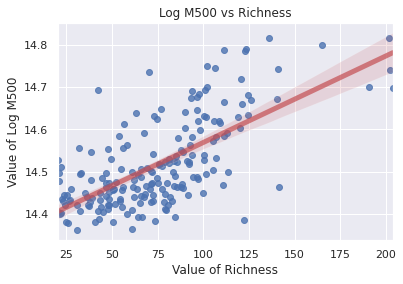

In [20]:
sns.regplot(x=df["LAMBDA_CHISQ"], y=df["log_M500"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title('Log M500 vs Richness')
plt.xlabel('Value of Richness')
plt.ylabel('Value of Log M500')

Text(492.8588235294119, 0.5, 'Value of Log 500')

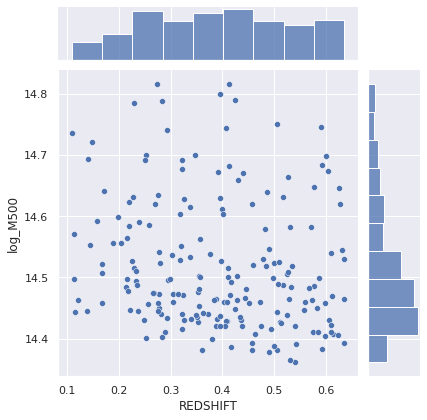

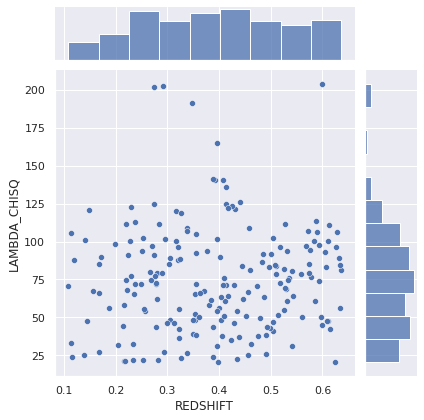

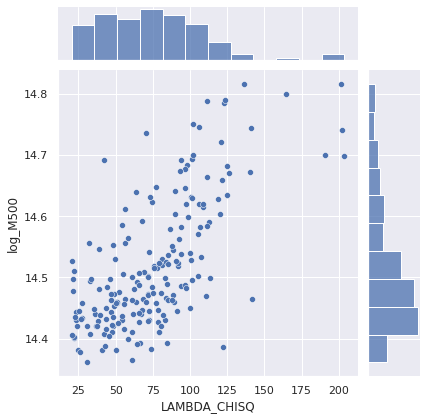

In [39]:
# Joint Histogram - Scatter Plot graph
sns.jointplot(x=df["REDSHIFT"], y=df["log_M500"], kind='scatter', ax=axs[0])
axs[1].set_xlabel('Value of Redshift')
axs[1].set_ylabel('Value of Log M500')
# ~70 points for each third of the plot
# Mass observer relation (paper)
# Implement their model using the MCMC package
# X is Richness and Y is log mass_500
sns.jointplot(x=df["REDSHIFT"], y=df["LAMBDA_CHISQ"], kind='scatter', ax=axs[1])
axs[1].set_xlabel('Value of Redshift')
axs[1].set_ylabel('Value of Richness')

sns.jointplot(x=df["LAMBDA_CHISQ"], y=df["log_M500"], kind='scatter', ax=axs[2])
axs[2].set_xlabel('Value of Richness')
axs[2].set_ylabel('Value of Log 500')

# The labelling doesn't work; probably due to Seaborn